In [1]:
import matplotlib.pyplot as plt
import numpy as np
from meshfracs.dataaccess import ElevationSplineFactory, GrayverInterpolatorFactory
from pyproj import Proj
import os

First, lets confirm the grayver data scheme produces an image we expect, with the west coast of CA oriented correctly in an image

In [2]:
user_home = os.path.expanduser("~")

def get_crs():
    longitude_center = -113
    latitude_center  = 39.75
    longitude_center = -113
    latitude_center  = 39.75
    azimuth_equid    = Proj(proj='aeqd', datum='WGS84', lon_0=longitude_center, lat_0=latitude_center, units='m')
    return azimuth_equid

projection = get_crs()
grayver_data_path = f'{user_home}/abetadatabase/world_conductance/grayver2021/conductance_world.h5'
x_values = np.linspace(-1.5e6,1e6,num=100)
y_values = np.linspace(-1e6, 1e6,num=100)

xx, yy = np.meshgrid(x_values, y_values, indexing='ij')

In [4]:
sediment_data_access = GrayverInterpolatorFactory(projection,path=grayver_data_path)
interpolator = sediment_data_access.get_interpolator(type='sediment thickness',x_points=x_values,
                                                                                  y_points=y_values)




In [7]:
x_values = np.linspace(-1.5e6,1e6,num=1000)
y_values = np.linspace(-1e6, 1e6,num=1000)

xx, yy = np.meshgrid(x_values, y_values, indexing='ij')
values = interpolator.get_values(xx,yy)

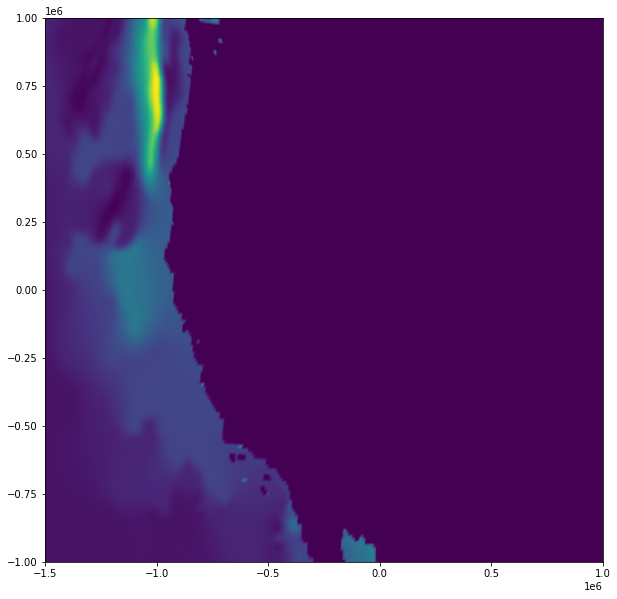

In [8]:
plt.figure(figsize=(10,10))
plt.pcolormesh(xx,yy,values)
plt.show()

Next, lets examine ElevationPatch

In [3]:
gebco_tile_path = f'{user_home}/abetadatabase/elevation/gebco/GEBCO'
x_values = np.linspace(-1.5e6,1e6,num=100)
y_values = np.linspace(-1e6, 1e6,num=100)

xx, yy = np.meshgrid(x_values, y_values, indexing='ij')

elevation_factory = ElevationSplineFactory(gebco_tile_path, projection)
x_values = np.linspace(-1.5e6,1e6,num=1000)
y_values = np.linspace(-1e6, 1e6,num=1000)

xx, yy = np.meshgrid(x_values, y_values, indexing='ij')

interpolator = elevation_factory.get_interpolator(xx,yy)

In [4]:
values = interpolator.get_values(xx,yy)

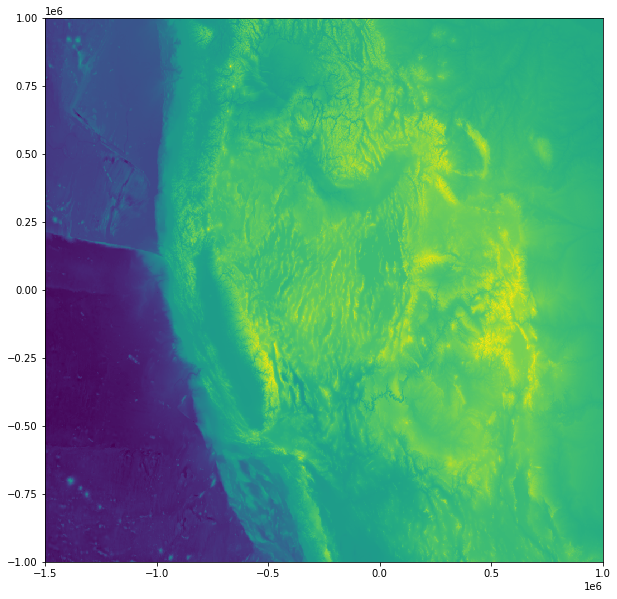

In [5]:
plt.figure(figsize=(10,10))
plt.pcolormesh(xx,yy,values)
plt.show()